# Book Recommendation System

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
#To mount google drive, I put my dataset into my drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#To change directory in google drive
import os
os.chdir('/content/drive/MyDrive/CS464-Project/dataset')

In [ ]:
books_dataset = pd.read_csv('books_data.csv')
ratings_dataset = pd.read_csv('Books_rating.csv')

In [ ]:
ratings_dataset.shape

(3000000, 10)

In [ ]:
ratings_dataset.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [ ]:
books_dataset.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [ ]:
books_dataset.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
ratings_dataset.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Data Pre-Processing


In [ ]:
# Filter the dataset to include only users with at least 20 reviews
filtered_ratings_dataset = ratings_dataset.groupby('User_id').filter(lambda x: len(x) >= 20)

In [ ]:
selected_columns = ['Title', 'User_id', 'review/score', 'review/time']
filtered_ratings_dataset = filtered_ratings_dataset[selected_columns]

In [ ]:
filtered_ratings_dataset.shape

(548134, 4)

In [ ]:
filtered_ratings_dataset.head(5)

,Title,User_id,review/score,review/time
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,1095724800
3,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,1090713600
5,Dr. Seuss: American Icon,A2F6NONFUDB6UK,4.0,1127174400
6,Dr. Seuss: American Icon,A14OJS0VWMOSWO,5.0,1100131200
11,Wonderful Worship in Smaller Churches,A373VVEU6Z9M0N,5.0,1291766400


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding for 'User_id', 'Title', and 'categories'
user_encoder = LabelEncoder()
title_encoder = LabelEncoder()

filtered_ratings_dataset['User_id'] = user_encoder.fit_transform(filtered_ratings_dataset['User_id'])
filtered_ratings_dataset['Title'] = title_encoder.fit_transform(filtered_ratings_dataset['Title'])

In [ ]:
filtered_ratings_dataset.head(5)

,Title,User_id,review/score,review/time
1,20778,5128,5.0,1095724800
3,20778,4136,4.0,1090713600
5,20778,3562,4.0,1127174400
6,20778,321,5.0,1100131200
11,93849,5561,5.0,1291766400


## Split Data Into Training-Validation-Test Set

In [ ]:
# Sort the dataset based on 'review/time'
filtered_ratings_dataset.sort_values('review/time', inplace=True)

# Calculate the indices for splitting
total_rows = len(filtered_ratings_dataset)
train_size = int(0.8 * total_rows)
test_size = int(0.1 * total_rows)

# Split the dataset
train_set = filtered_ratings_dataset.iloc[:train_size]
validation_set = filtered_ratings_dataset.iloc[train_size:(train_size + test_size)]
test_set = filtered_ratings_dataset.iloc[(train_size + test_size):]

## Train Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Concatenate, Flatten
from tensorflow.keras.models import Model

def create_collaborative_filtering_model(embedding_size = 20, dense_size = 128):

    # Get the number of unique users, items, and categories
    num_users = filtered_ratings_dataset['User_id'].nunique()
    num_items = filtered_ratings_dataset['Title'].nunique()

    # Define input layers for user and item IDs
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    # Embedding layers
    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, input_length=1)(item_input)

    # Flatten embeddings
    user_flat = Flatten()(user_embedding)
    item_flat = Flatten()(item_embedding)

    # Concatenate the flattened embeddings
    concatenated_features = Concatenate()([user_flat, item_flat])

    # Dense layer for further processing
    dense_layer = Dense(dense_size, activation='relu')(concatenated_features)

    # Output layer
    output_layer = Dense(1)(dense_layer)

    # Create the model
    model = Model(inputs=[user_input, item_input], outputs=output_layer)
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [ ]:
# Define the number of epochs
num_epochs = 5
default_batch_size = 64
model = create_collaborative_filtering_model()
model.fit(
    [
        train_set['User_id'],
        train_set['Title'],
    ],
    train_set['review/score'],
    epochs=num_epochs,
    batch_size = default_batch_size,
    validation_data=(
        [
            validation_set['User_id'],
            validation_set['Title'],
        ],
        validation_set['review/score']
    )
)

Epoch 1/5
6852/6852 [==============================] - 38s 5ms/step - loss: 0.9443 - val_loss: 0.9843
Epoch 2/5
6852/6852 [==============================] - 29s 4ms/step - loss: 0.5795 - val_loss: 1.0657
Epoch 3/5
6852/6852 [==============================] - 31s 4ms/step - loss: 0.4785 - val_loss: 1.1158
Epoch 4/5
6852/6852 [==============================] - 32s 5ms/step - loss: 0.4053 - val_loss: 1.1604
Epoch 5/5
6852/6852 [==============================] - 31s 4ms/step - loss: 0.3444 - val_loss: 1.1769


### Parameter Tuning

Epoch 1/5
6852/6852 [==============================] - 34s 5ms/step - loss: 0.9447 - val_loss: 0.9781
Epoch 2/5
6852/6852 [==============================] - 31s 4ms/step - loss: 0.5952 - val_loss: 1.0409
Epoch 3/5
6852/6852 [==============================] - 29s 4ms/step - loss: 0.5062 - val_loss: 1.0983
Epoch 4/5
6852/6852 [==============================] - 30s 4ms/step - loss: 0.4426 - val_loss: 1.1333
Epoch 5/5
6852/6852 [==============================] - 29s 4ms/step - loss: 0.3889 - val_loss: 1.1437
Epoch 1/5
6852/6852 [==============================] - 36s 5ms/step - loss: 0.9375 - val_loss: 0.9876
Epoch 2/5
6852/6852 [==============================] - 31s 5ms/step - loss: 0.5790 - val_loss: 1.0445
Epoch 3/5
6852/6852 [==============================] - 31s 5ms/step - loss: 0.4747 - val_loss: 1.1159
Epoch 4/5
6852/6852 [==============================] - 32s 5ms/step - loss: 0.3931 - val_loss: 1.1644
Epoch 5/5
6852/6852 [==============================] - 32s 5ms/step - loss: 0.3237

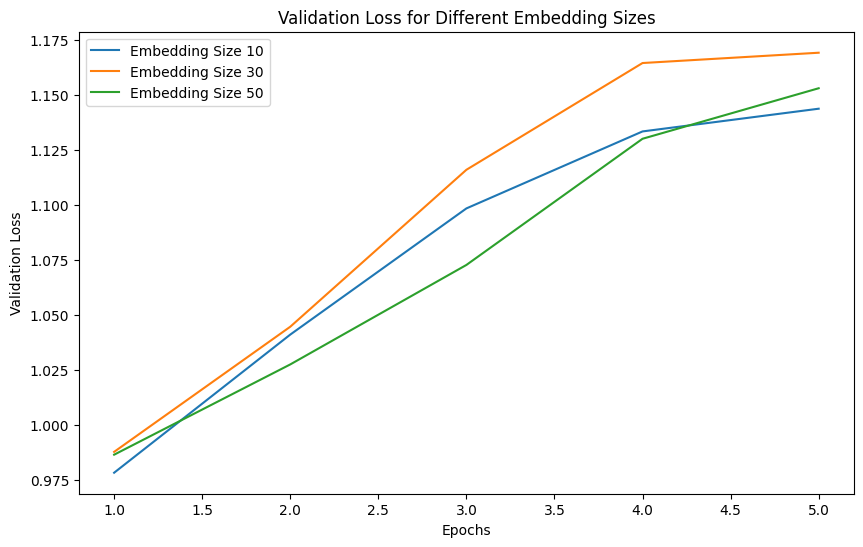

In [ ]:
import matplotlib.pyplot as plt

num_epochs = 5
default_batch_size = 64
embedding_sizes = [10, 30, 50]
validation_losses = []

for embedding_size in embedding_sizes:
    model = create_collaborative_filtering_model(embedding_size)

    history = model.fit(
        [
            train_set['User_id'],
            train_set['Title'],
        ],
        train_set['review/score'],
        epochs=num_epochs,
        batch_size=default_batch_size,
        validation_data=(
            [
                validation_set['User_id'],
                validation_set['Title'],
            ],
            validation_set['review/score']
        )
    )

    # Collect validation losses for plotting
    validation_losses.append(history.history['val_loss'])

# Plotting
plt.figure(figsize=(10, 6))

for i, embedding_size in enumerate(embedding_sizes):
    plt.plot(range(1, num_epochs + 1), validation_losses[i], label=f'Embedding Size {embedding_size}')

plt.title('Validation Loss for Different Embedding Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Epoch 1/5
6852/6852 [==============================] - 35s 5ms/step - loss: 1.0890 - val_loss: 0.9836
Epoch 2/5
6852/6852 [==============================] - 30s 4ms/step - loss: 0.5932 - val_loss: 1.0339
Epoch 3/5
6852/6852 [==============================] - 30s 4ms/step - loss: 0.4943 - val_loss: 1.1012
Epoch 4/5
6852/6852 [==============================] - 31s 4ms/step - loss: 0.4252 - val_loss: 1.1612
Epoch 5/5
6852/6852 [==============================] - 30s 4ms/step - loss: 0.3698 - val_loss: 1.1585
Epoch 1/5
6852/6852 [==============================] - 34s 5ms/step - loss: 1.0041 - val_loss: 1.0019
Epoch 2/5
6852/6852 [==============================] - 31s 5ms/step - loss: 0.5858 - val_loss: 1.0842
Epoch 3/5
6852/6852 [==============================] - 32s 5ms/step - loss: 0.4884 - val_loss: 1.1163
Epoch 4/5
6852/6852 [==============================] - 31s 5ms/step - loss: 0.4190 - val_loss: 1.1756
Epoch 5/5
6852/6852 [==============================] - 32s 5ms/step - loss: 0.3619

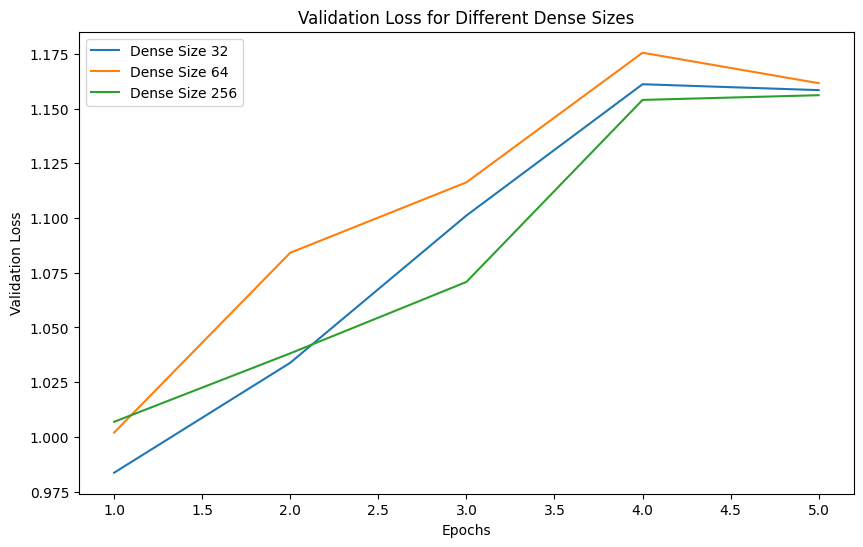

In [ ]:
import matplotlib.pyplot as plt

num_epochs = 5
default_batch_size = 64
dense_sizes = [32, 64, 256]
validation_losses = []

for dense_size in dense_sizes:
    model = create_collaborative_filtering_model(20, dense_size)

    history = model.fit(
        [
            train_set['User_id'],
            train_set['Title'],
        ],
        train_set['review/score'],
        epochs=num_epochs,
        batch_size=default_batch_size,
        validation_data=(
            [
                validation_set['User_id'],
                validation_set['Title'],
            ],
            validation_set['review/score']
        )
    )

    # Collect validation losses for plotting
    validation_losses.append(history.history['val_loss'])

# Plotting
plt.figure(figsize=(10, 6))

for i, dense_size in enumerate(dense_sizes):
    plt.plot(range(1, num_epochs + 1), validation_losses[i], label=f'Dense Size {dense_size}')

plt.title('Validation Loss for Different Dense Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Epoch 1/5
13704/13704 [==============================] - 66s 5ms/step - loss: 0.8488 - val_loss: 0.9937
Epoch 2/5
13704/13704 [==============================] - 62s 5ms/step - loss: 0.5812 - val_loss: 1.0365
Epoch 3/5
13704/13704 [==============================] - 61s 4ms/step - loss: 0.4837 - val_loss: 1.0920
Epoch 4/5
13704/13704 [==============================] - 63s 5ms/step - loss: 0.4081 - val_loss: 1.1218
Epoch 5/5
13704/13704 [==============================] - 60s 4ms/step - loss: 0.3462 - val_loss: 1.1538
Epoch 1/5
3426/3426 [==============================] - 22s 6ms/step - loss: 1.1782 - val_loss: 0.9960
Epoch 2/5
3426/3426 [==============================] - 16s 5ms/step - loss: 0.6056 - val_loss: 1.0400
Epoch 3/5
3426/3426 [==============================] - 18s 5ms/step - loss: 0.5072 - val_loss: 1.1089
Epoch 4/5
3426/3426 [==============================] - 16s 5ms/step - loss: 0.4344 - val_loss: 1.1608
Epoch 5/5
3426/3426 [==============================] - 16s 5ms/step - lo

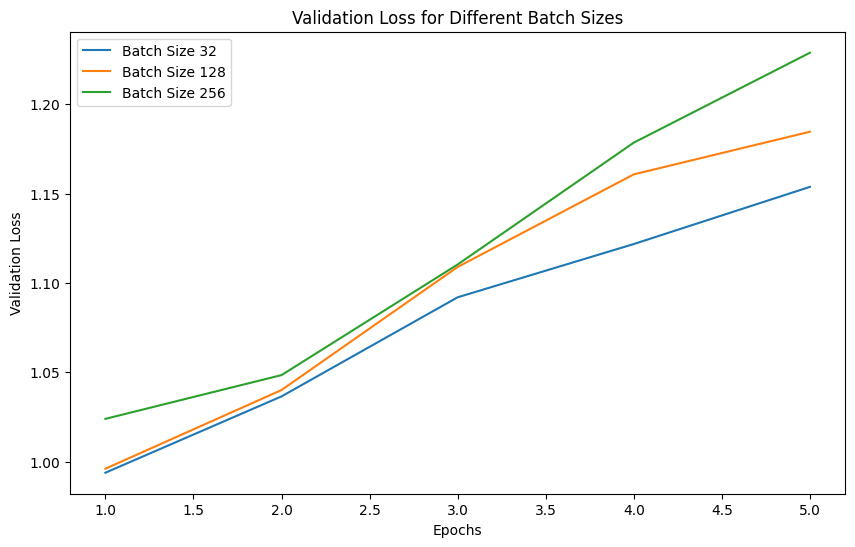

In [ ]:
import matplotlib.pyplot as plt

num_epochs = 5
batch_sizes = [32, 128, 256]
validation_losses = []

for batch_size in batch_sizes:
    model = create_collaborative_filtering_model()

    history = model.fit(
        [
            train_set['User_id'],
            train_set['Title'],
        ],
        train_set['review/score'],
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(
            [
                validation_set['User_id'],
                validation_set['Title'],
            ],
            validation_set['review/score']
        )
    )

    # Collect validation losses for plotting
    validation_losses.append(history.history['val_loss'])

# Plotting
plt.figure(figsize=(10, 6))

for i, batch_size in enumerate(batch_sizes):
    plt.plot(range(1, num_epochs + 1), validation_losses[i], label=f'Batch Size {batch_size}')

plt.title('Validation Loss for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


## Test Results

In [ ]:
#best model
model = create_collaborative_filtering_model(30,256)
model.fit(
      [
          train_set['User_id'],
          train_set['Title'],
      ],
      train_set['review/score'],
      epochs=num_epochs,
      batch_size = 32,
      validation_data=(
          [
              validation_set['User_id'],
              validation_set['Title'],
          ],
          validation_set['review/score']
      )
  )

Epoch 1/5
13704/13704 [==============================] - 66s 5ms/step - loss: 0.8197 - val_loss: 1.0075
Epoch 2/5
13704/13704 [==============================] - 64s 5ms/step - loss: 0.5707 - val_loss: 1.0365
Epoch 3/5
13704/13704 [==============================] - 66s 5ms/step - loss: 0.4623 - val_loss: 1.1119
Epoch 4/5
13704/13704 [==============================] - 62s 5ms/step - loss: 0.3781 - val_loss: 1.1636
Epoch 5/5
13704/13704 [==============================] - 64s 5ms/step - loss: 0.3104 - val_loss: 1.1790


In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(
    [
        test_set['User_id'],
        test_set['Title'],
    ],
    test_set['review/score']
)
print(f'Test Loss: {test_loss}')

# Make predictions on the test set
test_predictions = model.predict(
    [
        test_set['User_id'],
        test_set['Title'],
    ]
)

# Create a DataFrame with user, item, and predicted score
predictions_df = pd.DataFrame({
    'User_id': test_set['User_id'],
    'Title': test_set['Title'],
    'Actual_Score': test_set['review/score'],
    'Predicted_Score': test_predictions.flatten(),
})

1713/1713 [==============================] - 4s 2ms/step - loss: 1.2204
Test Loss: 1.2204052209854126
1713/1713 [==============================] - 3s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score

# Define a threshold for classification
threshold = 3

# Convert the continuous predictions to binary (1 if predicted score >= threshold, 0 otherwise)
binary_predictions = (test_predictions >= threshold).astype(int)

# Evaluate accuracy based on the threshold
accuracy_binary = accuracy_score((test_set['review/score'] >= threshold).astype(int), binary_predictions)
print(f'Accuracy (Threshold={threshold}): {accuracy_binary}')

Accuracy (Threshold=3): 0.9107162403765462


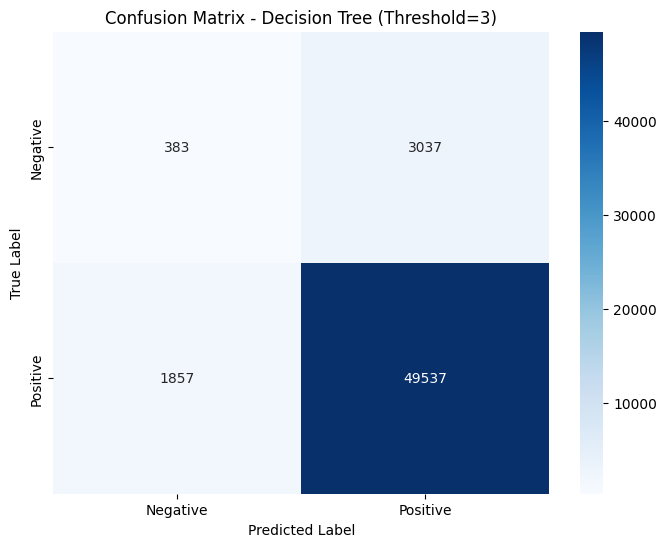

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_dt = confusion_matrix((test_set['review/score'] >= threshold).astype(int), binary_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - Decision Tree (Threshold={threshold})')
plt.show()

## Content Based Filtering

## Data Pre-Processing


In [ ]:
# Filter the dataset to include only users with at least 20 reviews
filtered_ratings_dataset = ratings_dataset.groupby('User_id').filter(lambda x: len(x) >= 20)

In [ ]:
# Merge the filtered ratings dataset with the books dataset on the 'Title' column
merged_dataset = pd.merge(filtered_ratings_dataset, books_dataset, on='Title', how='inner')
# Handle missing values and clean the data if needed
merged_dataset = merged_dataset.dropna()

<Axes: >

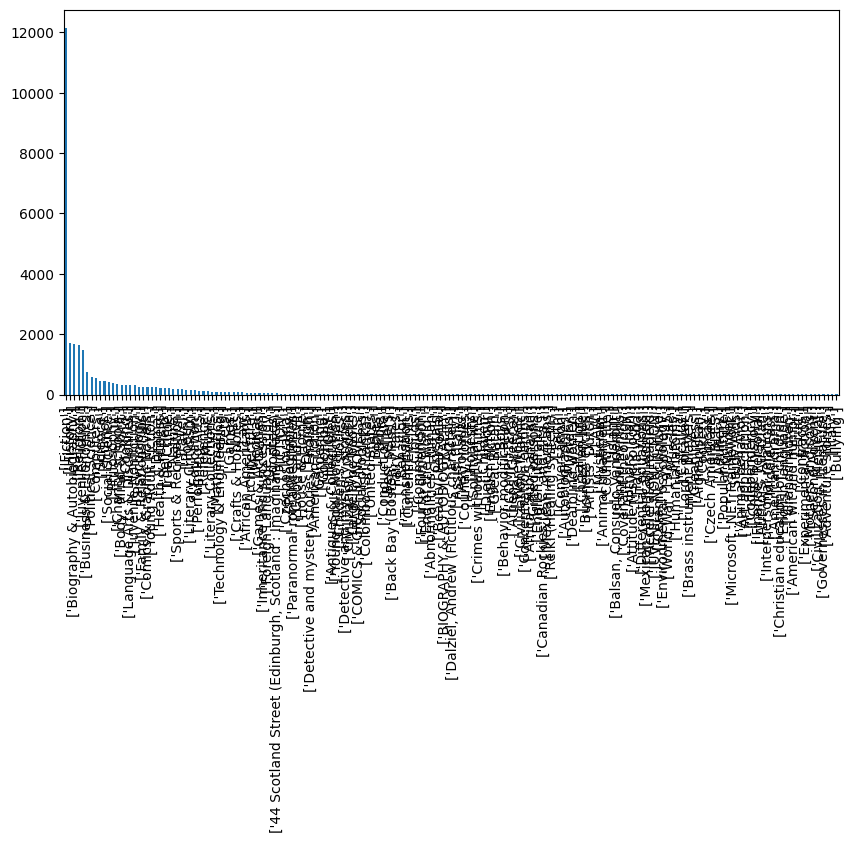

In [ ]:
# prompt: extract category value counts

merged_dataset['categories'].value_counts().plot(x = 'category', y ='count', kind = 'bar', figsize = (10,5))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


<Axes: title={'center': 'Top 20 Part-of-speech tagging for Descriptions'}>

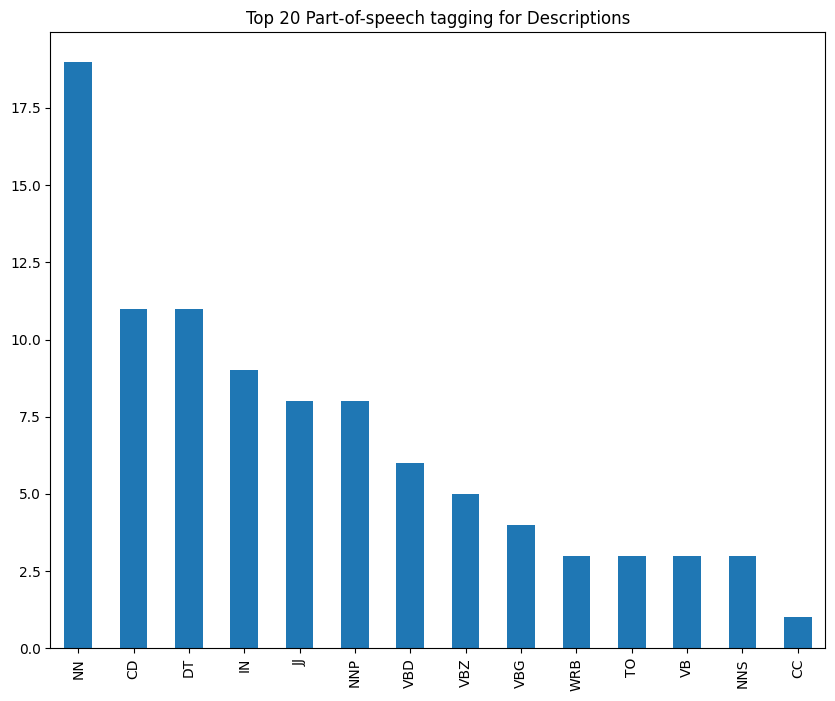

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
blob = TextBlob(str(merged_dataset['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for Descriptions")

<Axes: title={'center': 'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

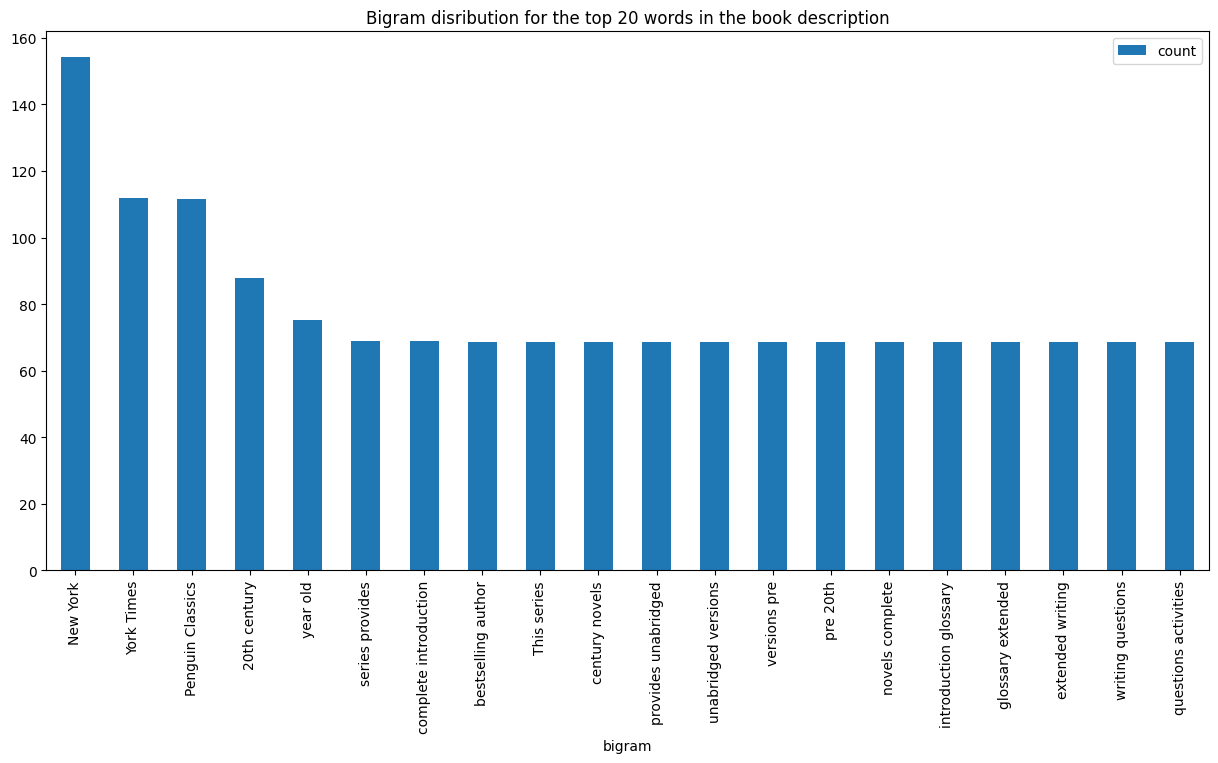

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(merged_dataset['description'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

<Axes: title={'center': 'Trigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

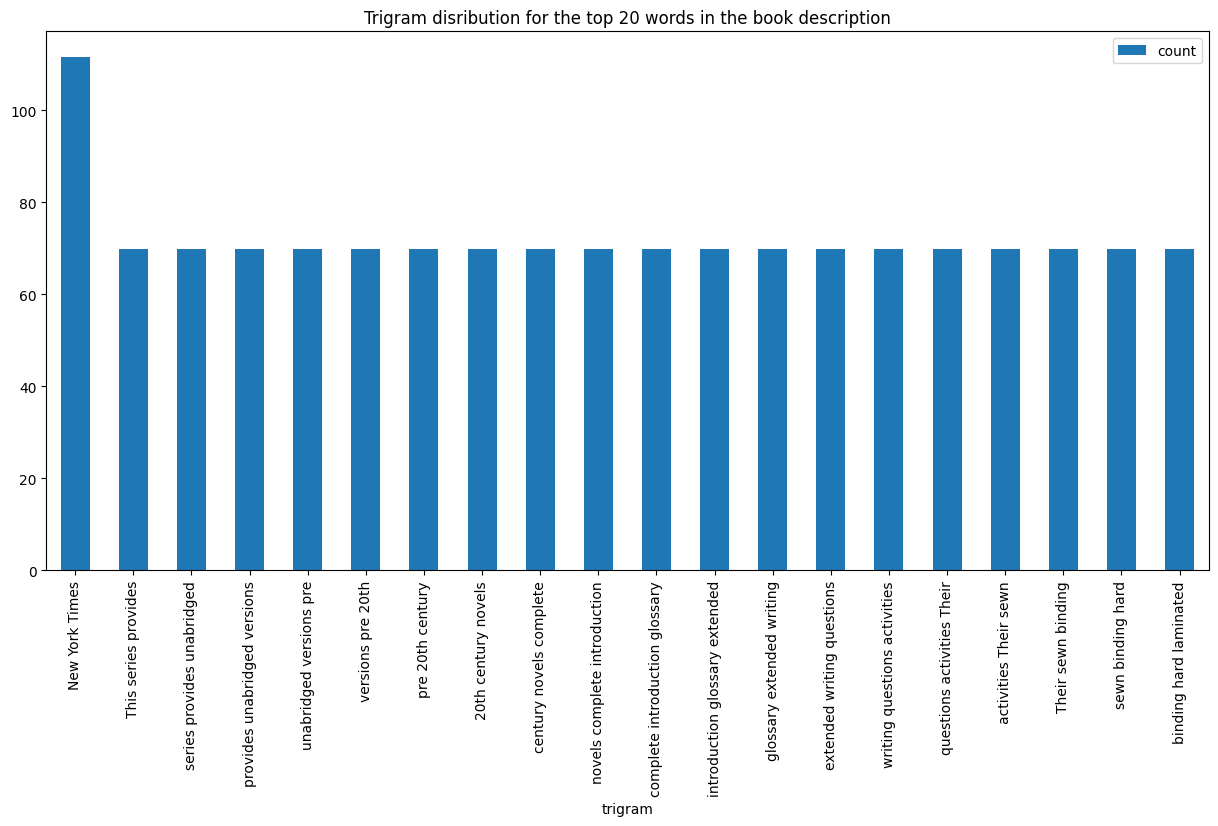

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(merged_dataset['description'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True)
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer

# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
merged_dataset['cleaned_desc'] = merged_dataset['description'].apply(_removeNonAscii)
merged_dataset['cleaned_desc'] = merged_dataset.cleaned_desc.apply(func = make_lower_case)
merged_dataset['cleaned_desc'] = merged_dataset.cleaned_desc.apply(func = remove_stop_words)
merged_dataset['cleaned_desc'] = merged_dataset.cleaned_desc.apply(func=remove_punctuation)
merged_dataset['cleaned_desc'] = merged_dataset.cleaned_desc.apply(func=remove_html)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommendByTitle(title, genre):

    # Matching the genre with the dataset and reset the index
    data = merged_dataset.loc[merged_dataset['categories'] == genre]
    data.reset_index(level = 0, inplace = True)

    # Keep only unique titles
    data = data.drop_duplicates(subset=['Title'])

    # Print boolean value based on title presence
    title_present = title in data['Title'].values
    print(f"Title '{title}' is present in data: {title_present}")

    # Convert the index into series
    indices = pd.Series(data.index, index = data['Title'])

    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['Title'])

    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to original_title

    idx = indices[title]
# Get the pairwsie similarity scores
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 10 most similar books
    sig = sig[1:11]
# Book indicies
    book_indices = [i[0] for i in sig]

    # Top 5 book recommendation
    rec = data[['Title', 'infoLink']].iloc[book_indices]

    # It reads the top 5 recommend book url and print the images

    for i in rec['Title']:
      print(i);

In [ ]:
recommendByTitle("The Rabbi's Cat", "['Comics & Graphic Novels']")

Title 'The Rabbi's Cat' is present in data: True
Forward the Mage
Alan Moore's Writing For Comics Volume 1
Promethea (Book 1)
Scientific Progress Goes 'Boink': A Calvin and Hobbes Collection
Gravitation, Vol. 8
The Invisibles Vol. 3: Entropy in the UK
The Little Man: Short Strips, 1980-1995
I Never Liked You
Hana-Kimi: For You in Full Blossom, Vol. 1
Berserk, Vol. 6


**BY DESCRIPTION**

In [ ]:
# Function for recommending books based on Book Description. It takes book title and genre as an input.
def recommendByDesc(title, genre):

    global rec
    # Matching the genre with the dataset and reset the index
    data = merged_dataset.loc[merged_dataset['categories'] == genre]
    data.reset_index(level = 0, inplace = True)

    # Keep only unique titles
    data = data.drop_duplicates(subset=['Title'])

    # Convert the index into series
    indices = pd.Series(data.index, index = data['Title'])

    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])

    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to original_title

    idx = indices[title]
# Get the pairwsie similarity scores
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 10 most similar books
    sig = sig[1:11]
# Book indicies
    book_indices = [i[0] for i in sig]

    # Top 5 book recommendation
    rec = data[['Title', 'infoLink']].iloc[book_indices]

    # It reads the top 5 recommend book url and print the images
    for i in rec['Title']:
      print(i)

In [ ]:
recommendByDesc("The Rabbi's Cat", "['Comics & Graphic Novels']")

Black Hole
D. Gray-Man, Vol. 1
Star Wars: Dark Forces: Soldier for the Empire GSA
Hot Gimmick, Vol. 9
The Little Man: Short Strips, 1980-1995
Berserk, Vol. 6
Sin City Volume 1: The Hard Goodbye (3rd Edition)
Doctor Solar: Man of the Atom Volume 1
Forward the Mage
Alan Moore's Writing For Comics Volume 1


In [ ]:
def recommendByBoth(title):
    # Create a new DataFrame to avoid modifying the original dataset
    data = merged_dataset.loc[merged_dataset['categories'] == "['Fiction']"]
    data.reset_index(level = 0, inplace = True)

    # Drop duplicates to keep only unique titles
    data = data.drop_duplicates(subset='Title').reset_index(drop=True)

    # Combine title and description into a single feature
    data['combined_features'] = data['Title'] + " " + data['cleaned_desc']

    # Convert the index into series
    indices = pd.Series(data.index, index=data['Title'])

    # Converting the combined feature into vectors using TF-IDF
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['combined_features'])

    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to the title
    if title not in indices:
        print(f"Title '{title}' not found.")
        return []

    idx = indices[title]

    # Get the pairwise similarity scores
    sig = list(enumerate(sg[idx]))

    # Exclude the book itself from the similarity scores and sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    sig = sig[1:11]  # Get the top 10 most similar books

    # Book indices
    book_indices = [i[0] for i in sig]

    # Top 10 book recommendations
    rec = data[['Title', 'infoLink']].iloc[book_indices]

    # Print the recommended book titles
    for i in rec['Title']:
        print(i)

In [ ]:
harry_potter_titles = merged_dataset.loc[merged_dataset['Title'].str.contains('Harry Potter'), 'Title']

if not harry_potter_titles.empty:
    print("Harry Potter titles found in merged_dataset:")
    for title in harry_potter_titles:
        print(title)
else:
    print("No Harry Potter titles found in merged_dataset.")

Harry Potter titles found in merged_dataset:
The Irresistible Rise of Harry Potter
The Irresistible Rise of Harry Potter
The Irresistible Rise of Harry Potter
Harry Potter and Philosophy: If Aristotle Ran Hogwarts
Harry Potter and Philosophy: If Aristotle Ran Hogwarts
Harry Potter and Philosophy: If Aristotle Ran Hogwarts
Harry Potter and Philosophy: If Aristotle Ran Hogwarts


In [ ]:
recommendByBoth("Harry Potter and Philosophy: If Aristotle Ran Hogwarts")

The Sunday Philosophy Club (Isabel Dalhousie Mysteries)
Menage a Magick (Wizard Twins, Book 1)
The Western Wizard (Renshai Trilogy)
Wizards & the Warriors (Chronicles of Age of Darkness) (Chronicles of An Age of Darkness 1)
Shiva in Steel
A Simple Story (Penguin Classics)
A Knight's Vow
Forbidden Magic: The Godwars Book 1
Rustic Sunset (Three Continents Press)
A Matter of Trust (Bluford High Series #2)


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    # Encode text to BERT's format
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    # Get embeddings
    outputs = bert_model(**inputs)
    # Use mean pooling to get a single vector representation
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.detach().numpy()

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def recommend_bert(title, top_n=10):
    # Create a new DataFrame to avoid modifying the original dataset
    data = merged_dataset.copy()

    # Drop duplicates to keep only unique titles
    data = data.drop_duplicates(subset='Title').reset_index(drop=True)

    # Check if the title is in the dataset
    if title not in data['Title'].values:
        print(f"Title '{title}' not found.")
        return []

    # Get the category of the input title
    input_category = data[data['Title'] == title]['categories'].iloc[0]

    # Filter data to include only books in the same category
    category_data = data[data['categories'] == input_category].copy()


    # Print the category and the number of books in this category
    print(f"Category: {input_category}")
    print(f"Number of books in this category: {len(category_data)}")

    category_data['combined_features'] = category_data['Title'] + " " + category_data['cleaned_desc']

    # Get BERT embeddings for the input title
    target_embedding = get_bert_embeddings(category_data[category_data['Title'] == title]['combined_features'].iloc[0])

    # Calculate similarities
    similarities = {}
    for _, row in category_data.iterrows():
        if row['Title'] != title:  # Skip the input title
            book_embedding = get_bert_embeddings(row['combined_features'])
            sim_score = cosine_similarity(target_embedding.reshape(1, -1), book_embedding.reshape(1, -1))[0][0]
            similarities[row['Title']] = sim_score

    # Sort and return top N similar books
    sorted_books = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_books

In [ ]:
recommended_books = recommend_bert("Harry Potter and Philosophy: If Aristotle Ran Hogwarts")
for book in recommended_books:
    print(book)

Category: ['Fiction']
Number of books in this category: 1377
('The Dreams in the Witch House: And Other Weird Stories (Penguin Classics)', 0.8703593)
('A Simple Story (Penguin Classics)', 0.8650646)
('Edgar Huntly: Or, Memoirs of a Sleep-Walker', 0.8593837)
('Right Behind: A Parody of Last Days Goofiness', 0.8541255)
('Hitting the Skids in Pixeltown: The Phobos Science Fiction Anthology (Volume 2)', 0.853407)
('Forty Stories (Penguin Classics)', 0.85321176)
('Riddle-Master', 0.85053307)
('The Lifted Veil', 0.8501919)
('Lonigan', 0.84961975)
('Siddhartha: An Indian Tale (Penguin Twentieth-Century Classics)', 0.84754115)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Create a new DataFrame to avoid modifying the original dataset
data = merged_dataset.copy()

# Drop duplicates to keep only unique titles
data = data.drop_duplicates(subset='Title').reset_index(drop=True)

# Combine title and description into a single feature
data['combined_features'] = data['Title'] + " " + data['cleaned_desc']

indices = pd.Series(data.index, index=data['Title'])

# Converting the combined feature into vectors using TF-IDF
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['combined_features'])

# Create a Series mapping book titles to their index
book_index = pd.Series(range(len(data)), index=data['Title'])

def recommendByBoth(title):
    # Create a new DataFrame to avoid modifying the original dataset
    data = merged_dataset.copy()

    # Drop duplicates to keep only unique titles
    data = data.drop_duplicates(subset='Title').reset_index(drop=True)

    # Combine title and description into a single feature
    data['combined_features'] = data['Title'] + " " + data['cleaned_desc']

    # Convert the index into series
    indices = pd.Series(data.index, index=data['Title'])

    # Converting the combined feature into vectors using TF-IDF
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['combined_features'])

    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to the title
    if title not in indices:
        print(f"Title '{title}' not found.")
        return []

    idx = indices[title]

    # Get the pairwise similarity scores
    sig = list(enumerate(sg[idx]))

    # Exclude the book itself from the similarity scores and sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    sig = sig[1:11]  # Get the top 10 most similar books

    # Book indices
    book_indices = [i[0] for i in sig]

    # Top 10 book recommendations
    rec = data[['Title', 'infoLink']].iloc[book_indices]

    # Print the recommended book titles
    for i in rec['Title']:
        print(i)


def get_similarity_scores(title):
    # Check if the title is in the dataset
    if title not in indices:
        print(f"Title '{title}' not found.")
        return {}

    idx = indices[title]

    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the pairwise similarity scores
    sig = list(enumerate(sg[idx]))

    # Exclude the book itself from the similarity scores
    sig = sig[1:]  # Exclude the book itself

    # Create a dictionary of title and similarity score
    similarity_scores = {data.iloc[i]['Title']: score for i, score in sig if i != idx}

    return similarity_scores

def get_similarity_score(book1, book2):
    idx1, idx2 = indices[book1], indices[book2]
    vector1, vector2 = tfidf_matrix[idx1], tfidf_matrix[idx2]

    # Calculate and return the cosine similarity score
    return cosine_similarity(vector1, vector2)[0][0]

In [ ]:
#Rastgele bir kodlanmış kullanıcı ID'si seçme
users_with_min_books = merged_dataset.groupby('User_id').filter(lambda x: len(x) >= 20)
user_id_encoded = np.random.choice(users_with_min_books['User_id'].unique())
user_read_books = users_with_min_books[users_with_min_books['User_id'] == user_id_encoded]['Title'].unique()

# Create user_ratings dictionary
user_ratings_data = users_with_min_books[users_with_min_books['User_id'] == user_id_encoded][['Title', 'review/score']]
user_ratings = dict(zip(user_ratings_data['Title'], user_ratings_data['review/score']))

# Dictionary to store accumulated similarity scores
accumulated_sim_scores = {}

print(len(user_read_books))
for user_book in user_read_books:
    print(user_book)
    # Get similarity scores of this book against all books
    sim_scores = get_similarity_scores(user_book)

    # Get the user's rating for this book
    user_rating = user_ratings.get(user_book, 0)

    # Accumulate scores, weighted by the user's rating
    for book_title, score in sim_scores.items():
        if book_title not in user_read_books:  # Exclude books the user has already read
            weighted_score = score * user_rating
            if book_title in accumulated_sim_scores:
                accumulated_sim_scores[book_title] += weighted_score
            else:
                accumulated_sim_scores[book_title] = weighted_score

print(accumulated_sim_scores)
# Normalize the scores
max_score = max(accumulated_sim_scores.values())
normalized_scores = {k: v / max_score for k, v in accumulated_sim_scores.items()}

# Sort books based on normalized scores
sorted_recommendations = sorted(normalized_scores.items(), key=lambda x: x[1], reverse=True)

# Select top 10 recommendations
top_recommendations = sorted_recommendations[:10]

final_recommendations = []
diversity_factor = 0.5

for book, score in sorted_recommendations:
    too_similar = any(get_similarity_score(book, rec) > diversity_factor for rec in final_recommendations)

    if not too_similar:
        final_recommendations.append(book)
        if len(final_recommendations) == 10:
            break

# Pair the final recommendations with their scores for sorting
final_recommendations_with_scores = [(book, normalized_scores[book]) for book in final_recommendations]

# Sort the final recommendations based on scores
sorted_final_recommendations = sorted(final_recommendations_with_scores, key=lambda x: x[1], reverse=True)

# Print the sorted final recommendations
print("Top 10 Sorted Recommendations after Diversity Factor:")
for rec in sorted_final_recommendations:
    print(f"{rec[0]} (Score: {rec[1]:.4f})")

20
Is Jesus the Only Savior?
Biblical Preaching: The Development and Delivery of Expository Messages
Now, That's a Good Question!
23 Minutes In Hell: One Man's Story About What He Saw, Heard, and Felt in that Place of Torment
The Jesus Quest: The Third Search for the Jew of Nazareth
New Testament History: A Narrative Account
Daily Life in the United States, 1920-1940: How Americans Lived Through the Roaring Twenties and the Great Depression
Jerusalem Countdown: A Warning to the World
The Race Set Before Us: A Biblical Theology of Perseverance and Assurance
The New Eating Right for a Bad Gut : The Complete Nutritional Guide to Ileitis, Colitis, Crohn's Disease, and Inflammatory Bowel Disease
Greatness of the Kingdom
Slaves, Women & Homosexuals: Exploring the Hermeneutics of Cultural Analysis
The New Testament in Its Literary Environment (Library of Early Christianity)
Word Biblical Commentary Vol. 35a, Luke 1:1-9:20
The Gospel according to Matthew (Pillar New Testament Commentary)
The T

In [ ]:
# Content + Collaborative
# Extract book titles from sorted_final_recommendations

user_id_encoded = np.array([user_id_encoded])
user_id_encoded = user_encoder.transform(user_id_encoded)
print(user_id_encoded)

recommended_book_titles = [rec[0] for rec in sorted_final_recommendations]

# Ensure we have 10 titles (or all of them if less than 10)
book_titles_to_predict = recommended_book_titles[:10]

# Convert book titles to their encoded format
book_titles_formatted = title_encoder.transform(recommended_book_titles[:10])
print(len(book_titles_formatted))

# Prepare user IDs in the correct format
user_ids_formatted = np.array([user_id_encoded] * 10, dtype='int32')

# Make predictions using the collaborative filtering model
predicted_scores = model.predict([user_ids_formatted, book_titles_formatted])

# Create a DataFrame with the recommended book titles and predicted scores
recommendations_df = pd.DataFrame({
    'Book_Title': title_encoder.inverse_transform(book_titles_formatted),
    'Predicted_Score': predicted_scores.flatten()
})

#Puanı 3.0'dan yüksek olan kitapları filtreleme ve azalan sırada sıralama
recommended_books = recommendations_df[recommendations_df['Predicted_Score'] > 3.0].sort_values(by='Predicted_Score', ascending=False)

#Önerilen kitapları ve tahmin edilen puanları kullanıcıya sunma
print(f"Recommended Books for User ID (encoded): {user_id_encoded}")
print(recommended_books)

[7558]
10
1/1 [==============================] - 0s 20ms/step
Recommended Books for User ID (encoded): [7558]
                                          Book_Title  Predicted_Score
5  Matthew 1-28 MacArthur New Testament Commentar...         4.799201
4  Revelation (Baker Exegetical Commentary on the...         4.776924
1           A Biblical Theology of the New Testament         4.597389
0  Word Biblical Commentary Vol. 33a, Matthew 1-1...         4.593740
9    The Message of the New Testament: Promises Kept         4.565482
2        Theological Dictionary of the New Testament         4.565370
8  The Book of Revelation (New International Comm...         4.562567
3  Hebrews: New Testament Commentary (MacArthur N...         4.504512
6                  The New Interpreter's Bible Index         4.492737
7  The Letter of James (Pillar New Testament Comm...         3.918386


In [ ]:
# Random predictions
#Veri setinden rastgele 10 kitap başlığını seçme ve kodlama
random_book_titles = np.random.choice(train_set['Title'].unique(), size=10, replace=False)

#Kullanıcı ID'sini ve kitap başlıklarını uygun formata dönüştürme
user_ids_formatted = np.array([user_id_encoded] * 10, dtype='int32')
book_titles_formatted = np.array(random_book_titles, dtype='int32')

#Model tahminlerini yapma
predicted_scores = model.predict([user_ids_formatted, book_titles_formatted])

#Tahmin edilen puanları ve kitap başlıklarını bir DataFrame'e dönüştürme
recommendations_df = pd.DataFrame({
    'Book_Title': title_encoder.inverse_transform(random_book_titles),
    'Predicted_Score': predicted_scores.flatten()
})

#Puanı 3.0'dan yüksek olan kitapları filtreleme ve azalan sırada sıralama
recommended_books = recommendations_df[recommendations_df['Predicted_Score'] > 3.0].sort_values(by='Predicted_Score', ascending=False)

#Önerilen kitapları ve tahmin edilen puanları kullanıcıya sunma
print(f"Recommended Books for User ID (encoded): {user_id_encoded}")
print(recommended_books)

1/1 [==============================] - 0s 19ms/step
Recommended Books for User ID (encoded): [7558]
                                          Book_Title  Predicted_Score
7  The Trouser Press Guide to 90's Rock: The All-...         4.977509
1  How to Run Successful High-Tech Project-Based ...         4.627956
0             Heaven Must Be Like This: A Love Story         4.626163
5      Plains Crazy (Mad Dog & Englishman Mysteries)         4.415982
6  Rubinstein's Chess Masterpieces : 100 Selected...         4.112335
2  Verano del Pequeno San John, El (Spanish Edition)         4.102434
9                                Mr. Midshipman Easy         4.010497
8   Human and Divine: 2000 Years of Indian Sculpture         3.829274
3                                Bride of the Dragon         3.822010
4                              Puppy Lost in Lapland         3.746090
